<a href="https://colab.research.google.com/github/patrickdevv/FIAP_Fase01_Desafio/blob/main/Desafio_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pós Tech - IA para Devs - Fase 1 - Desafio

## Exploração dos dados

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('insurance.csv')

In [ ]:
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [ ]:
# Informações básicas sobre os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Estatísticas descritivas
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [ ]:
# Verificar valores ausentes
missing_values = df.isnull().sum()
missing_values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

✅ **Sem valores ausentes**

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

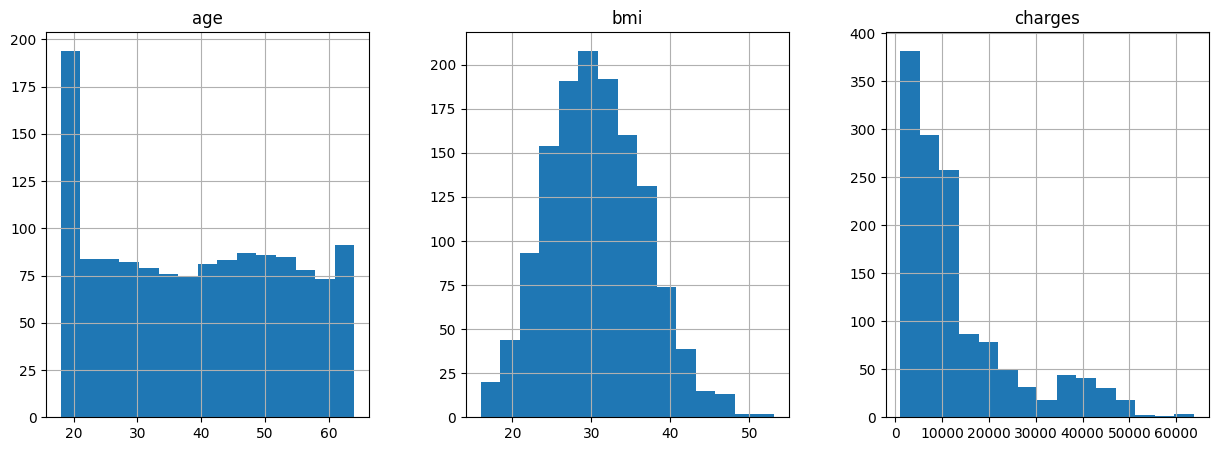

In [ ]:
# Visualizar a distribuição das variáveis numéricas
numeric_cols = ['age', 'bmi', 'charges']
df[numeric_cols].hist(bins=15, figsize=(15, 5), layout=(1, 3))


**- Age** - Leve inclinaçao para os mais jovens. As demais idades estão bem distribuidas.   ???? Será que é necessário criarmos faixas de idades ?????

**- BMI (IMC)** - concentração maior próximo aos 30.

**- charges** - maior quantidade para os valores mais baixos.

In [ ]:
# Analisar a correlação entre as variáveis
matriz_correlacao = df[numeric_cols].corr()
matriz_correlacao

age       bmi   charges
age      1.000000  0.109272  0.299008
bmi      0.109272  1.000000  0.198341
charges  0.299008  0.198341  1.000000

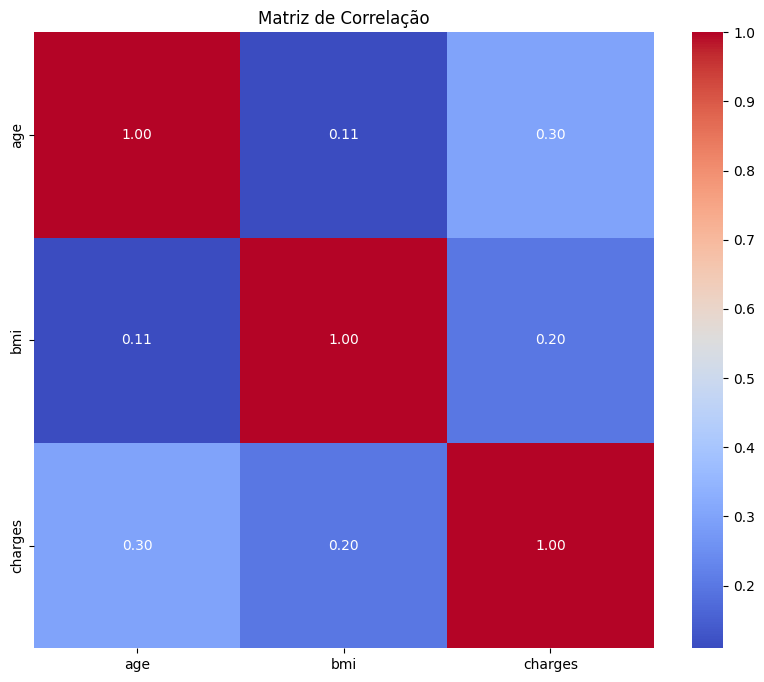

In [ ]:
# Visualizar correlação
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()


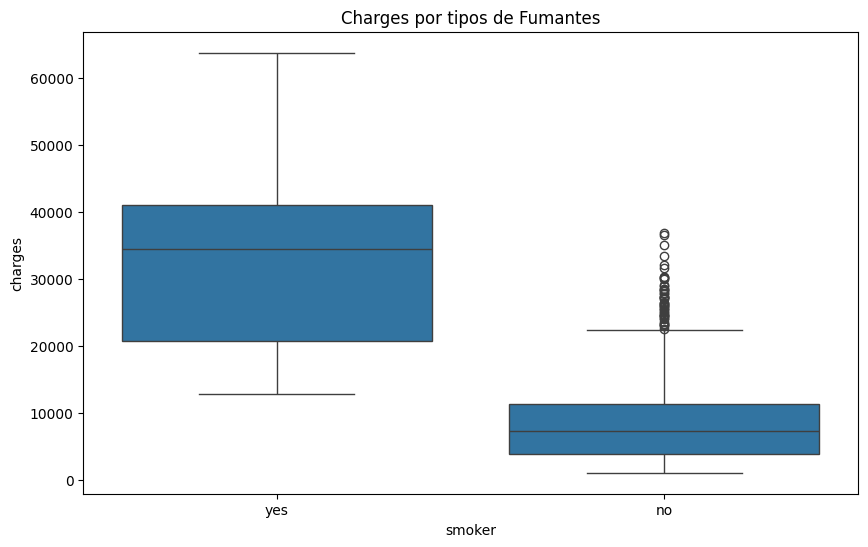

In [ ]:
# Análise da distribuição de custos por fumantes e não-fumantes
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges por tipos de Fumantes')
plt.show()

- Correlação positiva entre Age, bmi e Charger
- Correlação forte entre fumantes e charger maiores e o inverso também

## Pré processamento

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [ ]:
# Definir as variáveis preditoras e a variável alvo
X = df.drop('charges', axis=1)
y = df['charges']

In [ ]:
# Codificar variáveis categóricas e padronizar variáveis numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'children']),
        ('cat', OneHotEncoder(), ['sex', 'smoker', 'region'])
    ])

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['age', 'bmi', 'children']),
                                ('cat', OneHotEncoder(),
                                 ['sex', 'smoker', 'region'])])

In [ ]:
# Aplicar a transformação nos dados
X_transformed = preprocessor.fit_transform(X)
X_transformed[0]


array([-1.43876426, -0.45332   , -0.90861367,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        1.        ])

In [ ]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1070, 11), (268, 11), (1070,), (268,))

## Treinamento
Utilizando Regressão e Random Forest

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Instanciar os modelos
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

In [ ]:
# Treinar os modelos e avaliar
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        'RMSE': mean_squared_error(y_test, y_pred, squared=False),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2 Score': r2_score(y_test, y_pred)
    }

In [ ]:
from IPython.display import display

In [ ]:
results_df = pd.DataFrame(results).T
display(results_df)

RMSE          MAE  R2 Score
Linear Regression  5796.284659  4181.194474  0.783593
Random Forest      4588.158846  2540.993475  0.864403

In [ ]:
!apt-get install -y graphviz
!pip install graphviz pydot


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
import graphviz

# Treinar o modelo Random Forest novamente para garantir consistência
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Extrair uma das árvores do modelo Random Forest
tree = rf_model.estimators_[0]

# Obter os nomes das características após a transformação
# Obtendo os nomes das características numéricas
numeric_feature_names = ['age', 'bmi', 'children']

# Obtendo os nomes das características categóricas após a transformação
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(['sex', 'smoker', 'region'])

# Combinar todos os nomes das características
all_feature_names = numeric_feature_names + list(categorical_feature_names)

# Exportar a árvore para o formato DOT
dot_data = export_graphviz(tree, out_file="tree.dot",
                           feature_names=all_feature_names,
                           filled=True, rounded=True,
                           special_characters=True)

# Convertendo o arquivo .dot para .png
(graph,) = pydot.graph_from_dot_file("tree.dot")
graph.write_png("tree.png")


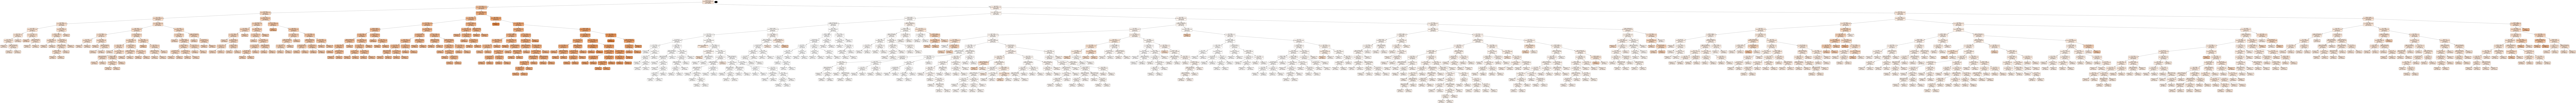